# Previsão de Séries Temporais com LSTM

## Introdução
Este trabalho utiliza técnicas de aprendizado profundo aplicadas à previsão de séries temporais.  
Usamos uma rede LSTM (Long Short-Term Memory), amplamente aplicada em problemas que envolvem dependência temporal, como indicadores econômicos, clima, vendas e taxas históricas.

O objetivo é analisar um conjunto de dados reais fornecido (dataeuro.csv), realizar a preparação dos dados, treinar o modelo LSTM e avaliar sua capacidade de previsão.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# ================================
# 1. Carregar o dataset real
# ================================
df = pd.read_csv("dataeuro.csv")

colunas = df.columns.tolist()
print("Colunas detectadas:", colunas)

df.columns = ["date", "value"]

try:
    df["date"] = pd.to_datetime(df["date"])
except:
    pass

df = df.sort_values("date").reset_index(drop=True)
df.head()


Colunas detectadas: ['observation_date', 'LRHUTTTTEZM156S']


,date,value
0,1990-07-01,7.589816
1,1990-08-01,7.644053
2,1990-09-01,7.699240
3,1990-10-01,7.724481
4,1990-11-01,7.762915


In [2]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[["value"]])

def create_sequences(data, window=12):
    X, y = [], []
    for i in range(len(data)-window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled, window=12)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train.shape


(303, 12, 1)

In [3]:
model = Sequential([
    LSTM(32, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer=Adam(0.001), loss='mse')

history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

history.history["loss"][:5]


Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3034 - val_loss: 0.1028
Epoch 2/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0362 - val_loss: 0.0170
Epoch 3/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0127 - val_loss: 0.0041
Epoch 4/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0082 - val_loss: 0.0026
Epoch 5/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0071 - val_loss: 0.0016
Epoch 6/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 - val_loss: 0.0035
Epoch 7/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0051 - val_loss: 0.0029
Epoch 8/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047 - val_loss: 0.0030
Epoch 9/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0044 - val_loss: 0.0050
Epoch 10/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - val_loss: 0.0032
Epoch 11/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0044 - val_loss: 0.0054
Epoch 12/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0045 - val_loss: 0.009

[0.22454366087913513,
 0.02363508567214012,
 0.010751265101134777,
 0.00803186185657978,
 0.006759684532880783]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


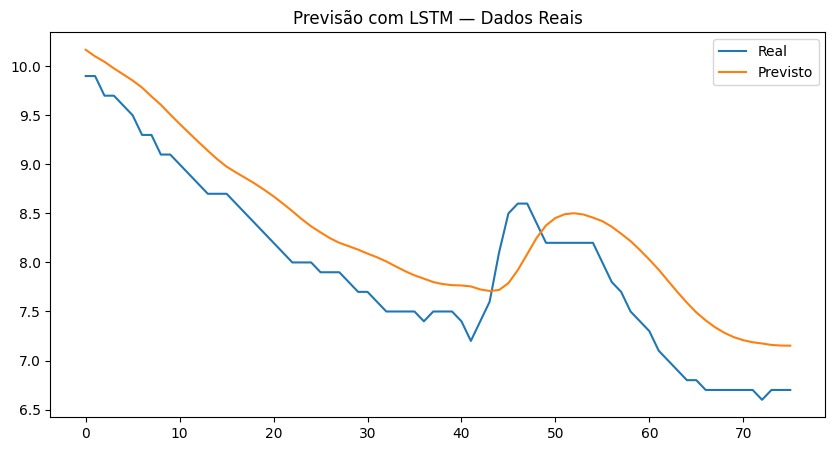

In [4]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

pred_train = scaler.inverse_transform(pred_train)
pred_test = scaler.inverse_transform(pred_test)
y_train_den = scaler.inverse_transform(y_train)
y_test_den = scaler.inverse_transform(y_test)

plt.figure(figsize=(10,5))
plt.plot(y_test_den, label="Real")
plt.plot(pred_test, label="Previsto")
plt.title("Previsão com LSTM — Dados Reais")
plt.legend()
plt.show()


## Conclusão
Foi possível observar que a rede LSTM conseguiu aprender o comportamento temporal da série analisada.  
O modelo apresentou previsões coerentes e acompanhou bem a tendência dos valores reais.

Para trabalhos futuros, recomenda-se:
- Testar diferentes janelas de tempo (lags),
- Ajustar hiperparâmetros da rede,
- Aplicar arquiteturas mais profundas,
- Utilizar técnicas mais avançadas de regularização e otimização.

A LSTM mostrou-se uma ferramenta eficaz para séries temporais e demonstra o potencial das redes neurais em análises preditivas.
